In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [48]:
data = pd.read_csv("Churn_Modelling.csv")

In [49]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [51]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [52]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [53]:
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [54]:
q1=data["Age"].quantile(0.25)
q3=data["Age"].quantile(0.75)
IQR=q3-q1
outliers = data["Age"][((data["Age"]<(q1-1.5*IQR)) | (data["Age"]>(q3+1.5*IQR)))]
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))


number of outliers: 359
max outlier value: 92
min outlier value: 63


In [55]:
q1=data["CreditScore"].quantile(0.25)
q3=data["CreditScore"].quantile(0.75)
IQR=q3-q1
outliers = data["CreditScore"][((data["CreditScore"]<(q1-1.5*IQR)) | (data["CreditScore"]>(q3+1.5*IQR)))]
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))


number of outliers: 15
max outlier value: 382
min outlier value: 350


In [56]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(data['Age'] >= (Q3+1.5*IQR))
lower = np.where(data['Age'] <= (Q1-1.5*IQR))
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
Q1 = np.percentile(data['CreditScore'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['CreditScore'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(data['CreditScore'] >= (Q3+1.5*IQR))
lower = np.where(data['CreditScore'] <= (Q1-1.5*IQR))
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
data.shape

(9574, 11)

# Univariate Analysis

(array([ 225.,  585., 1154., 2180., 1833., 1412., 1055.,  502.,  309.,
         319.]),
 array([18. , 22.3, 26.6, 30.9, 35.2, 39.5, 43.8, 48.1, 52.4, 56.7, 61. ]),
 <a list of 10 Patch objects>)

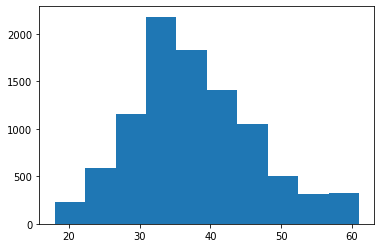

In [57]:
plt.hist(data["Age"])

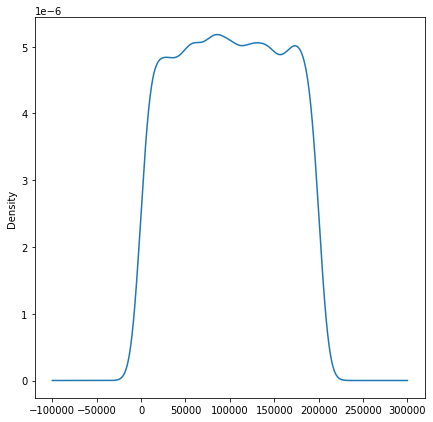

In [58]:
plt.figure(figsize=(7,7))
data["EstimatedSalary"].plot(kind="density")

# Bivariate Analysis

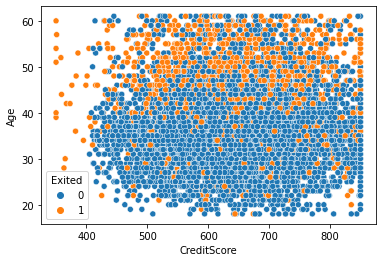

In [60]:
sns.scatterplot(x=data["CreditScore"],y=data['Age'],hue=data["Exited"])

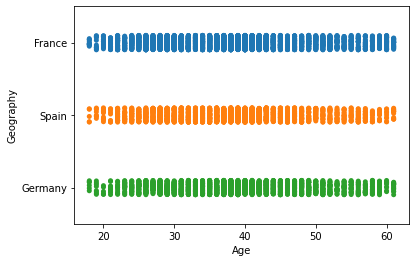

In [61]:
sns.stripplot(x=data["Age"],y=data["Geography"])

# Multivariate Analysis


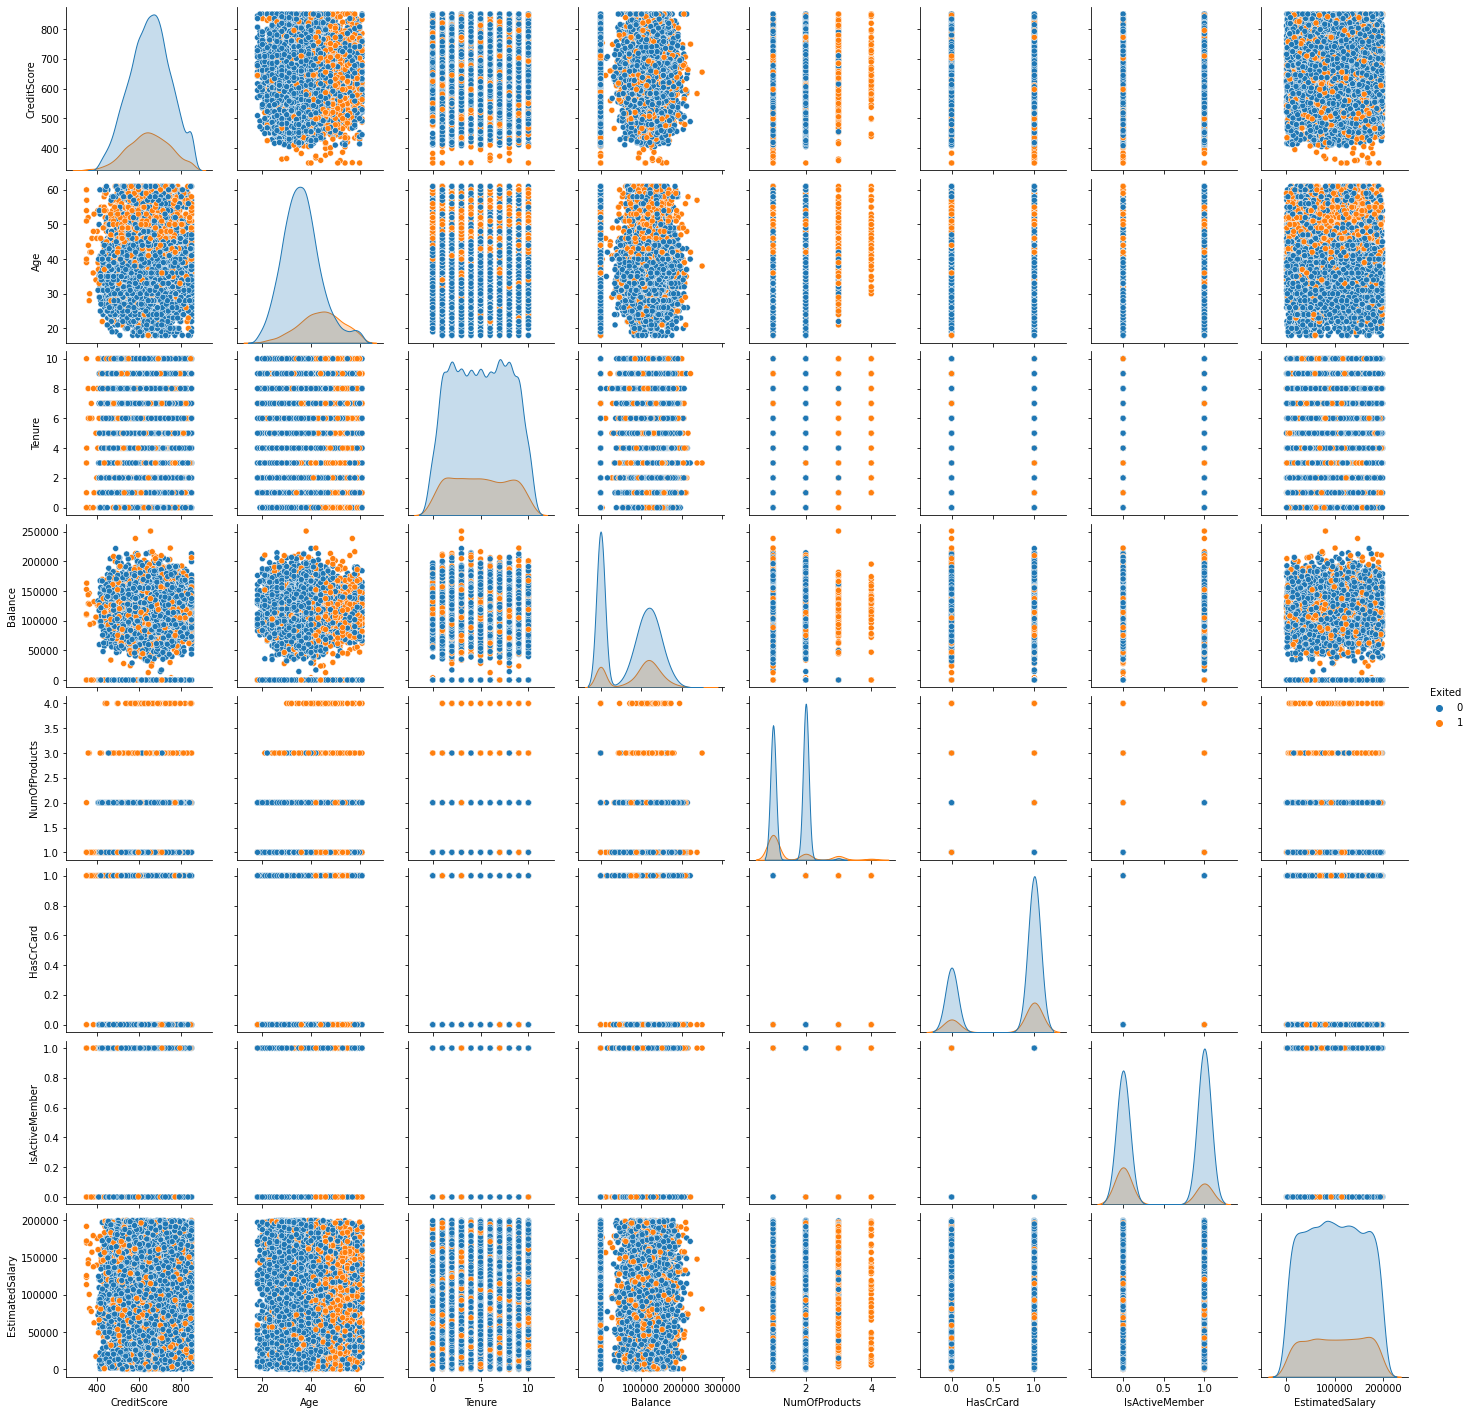

In [62]:
sns.pairplot(data,hue='Exited')

In [63]:
temp = ["Gender","Geography"]
for i in temp:
  enc = pd.get_dummies(data[i],drop_first=True)
  data = data.drop(columns=[i])
  data = data.join(enc)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [64]:
X = data.drop('Exited',axis=1)
y = data['Exited'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [66]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)